# Pengenalan proyek

Proyek ini bertujuan untuk membangun sebuah sistem rekomendasi anime yang dipersonalisasi bagi pengguna. Sistem ini akan memanfaatkan berbagai model, termasuk Content-Based Filtering dan Collaborative Filtering, untuk menganalisis karakteristik anime dan interaksi pengguna sebelumnya. Tujuannya adalah untuk memberikan rekomendasi yang lebih akurat dan relevan, sehingga meningkatkan engagement dan kepuasan pengguna di platform distribusi anime.

Untuk mencapai tujuan ini, proyek ini akan menggunakan dataset yang komprehensif dari Kaggle. Anda bisa mengakses dataset ini melalui tautan berikut: [Anime Database 2022](https://www.kaggle.com/datasets/harits/anime-database-2022).

Dataset ini mencakup berbagai informasi penting yang akan digunakan dalam pembangunan model rekomendasi, meliputi:

- ID: ID anime di MyAnimeList.net
- Title: Judul asli anime
- Synonyms: Judul sinonim dari anime
-Japanese: Judul anime dalam bahasa Jepang
- English: Judul anime dalam bahasa Inggris
- Synopsis: Ringkasan atau overview dari anime
- Type: Tipe anime (misalnya, TV, Movie, OVA)
- Episodes: Jumlah episode dalam anime
- Status: Status penayangan anime (belum tayang, sedang tayang, atau sudah tayang)
- Start_Aired: Tanggal atau tahun mulai penayangan anime
- End_Aired: Tanggal atau tahun berakhirnya penayangan anime
- Premiered: Musim tayang perdana
- Broadcast: Jadwal siaran anime
- Producers: Daftar produser
- Licensors: Daftar pemberi lisensi
- Studios: Daftar studio produksi
- Source: Sumber adaptasi anime
- Genres: Daftar genre (misalnya, Action, Comedy, Fantasy)
- Themes: Daftar tema (misalnya, School, Mecha, Super Power)
- Demographics: Daftar demografi target
- Duration_Minutes: Total durasi per menit setiap episode
- Rating: Peringkat umur
- Score: Skor rata-rata anime dari pengguna MyAnimeList.net
- Scored_Users: Jumlah pengguna yang memberikan skor
- Ranked: Peringkat berdasarkan skor
- Popularity: Peringkat berdasarkan popularitas (jumlah pengguna yang menambahkan ke daftar)
- Members: Jumlah pengguna yang telah menambahkan anime ke daftar mereka
- Favorites: Jumlah pengguna yang telah menandai anime sebagai favorit mereka

# Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset

In [5]:
# load data
df = pd.read_csv('data/anime.csv')
df.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


# Data Understanding

In [6]:
# cek ukuran dan data tyoe
df.info()
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print("-"*50)

# cek nilai hilang
null_value = df.isnull().sum()
null_value = null_value[null_value > 0]
total_rows = df.shape[0]
null_percentage = (null_value / total_rows) * 100

null_summary = pd.DataFrame({
    'Total Missing': null_value,
    'Percentage': null_percentage.round(2)
})

display(null_summary)
print("-"*50)

# cek baris duplikat
duplicated_row = df.duplicated().sum()
print(f"Total duplicated row: {duplicated_row}")
print("-"*50)

# statistik deskriptif
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

,Total Missing,Percentage
Episodes,547,2.55
Duration_Minutes,599,2.79
Rating,545,2.54
Score,6898,32.14
Scored_Users,6898,32.14
Ranked,1924,8.97


--------------------------------------------------
Total duplicated row: 0
--------------------------------------------------


,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.000000,20913.000000,20861.000000,14562.000000,14562.000000,19536.000000,21460.000000,2.146000e+04,21460.000000
mean,26458.575582,13.272892,23.934135,6.421724,26507.173809,97795.212019,10743.103681,3.926596e+04,462.214865
std,17100.477121,48.792326,24.676538,0.910469,84989.501599,56485.384273,6204.685188,1.566359e+05,4411.931536
min,1.000000,1.000000,1.000000,1.841000,101.000000,12.000000,1.000000,6.000000e+00,0.000000
25%,8454.750000,1.000000,5.000000,5.791000,418.000000,48879.500000,5369.750000,2.910000e+02,0.000000
50%,31004.500000,2.000000,22.000000,6.431000,1876.500000,97777.000000,10741.500000,1.582500e+03,2.000000
75%,40495.250000,12.000000,26.000000,7.081000,11406.500000,146714.500000,16119.250000,1.158550e+04,23.000000
max,53094.000000,3057.000000,168.000000,9.131000,997243.000000,195632.000000,21490.000000,3.524109e+06,207772.000000


**Insight dari Struktur dan Statistik Dataset**

- Dataset ini memiliki 21.460 entri unik dengan 28 kolom, menyediakan data yang kaya untuk analisis. Namun, kami mengidentifikasi nilai-nilai yang hilang secara signifikan pada kolom Score dan Scored_Users (sekitar 32%), serta Ranked (sekitar 9%). Kolom Episodes, Duration_Minutes, dan Rating juga memiliki sejumlah kecil missing value (sekitar 2.5-2.79%).

- Sebagian besar kolom adalah tipe teks (object), seperti Genres, Themes, Synopsis, Producers, dan Studios, yang akan memerlukan pra-pemrosesan teks ekstensif untuk Content-Based Filtering. Kolom numerik seperti Popularity, Members, dan Favorites menunjukkan distribusi yang sangat miring, mengindikasikan adanya anime yang sangat populer dan yang lebih niche.

## EDA

In [7]:
# Mengelompokkan numerical kolom
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)

['ID', 'Episodes', 'Duration_Minutes', 'Score', 'Scored_Users', 'Ranked', 'Popularity', 'Members', 'Favorites']


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Episodes'}>,
        <Axes: title={'center': 'Duration_Minutes'}>],
       [<Axes: title={'center': 'Score'}>,
        <Axes: title={'center': 'Scored_Users'}>,
        <Axes: title={'center': 'Ranked'}>],
       [<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'Members'}>,
        <Axes: title={'center': 'Favorites'}>]], dtype=object)

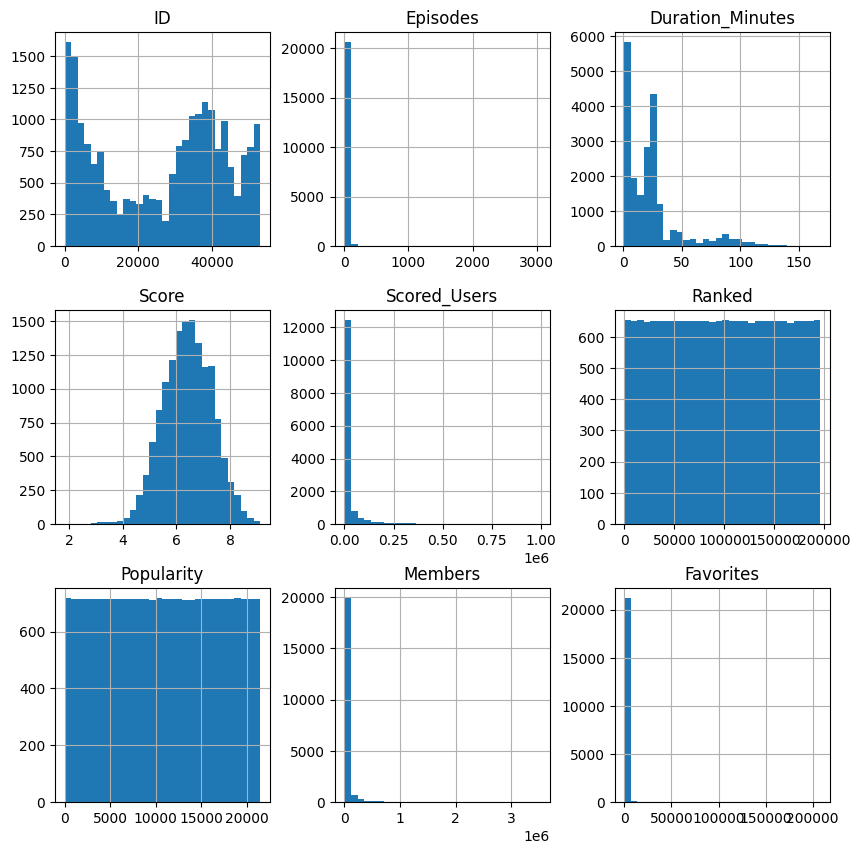

In [8]:
# Histogram untuk melihat persebaran nilai kolom numeric
df.hist(figsize=(10, 10), bins=30)

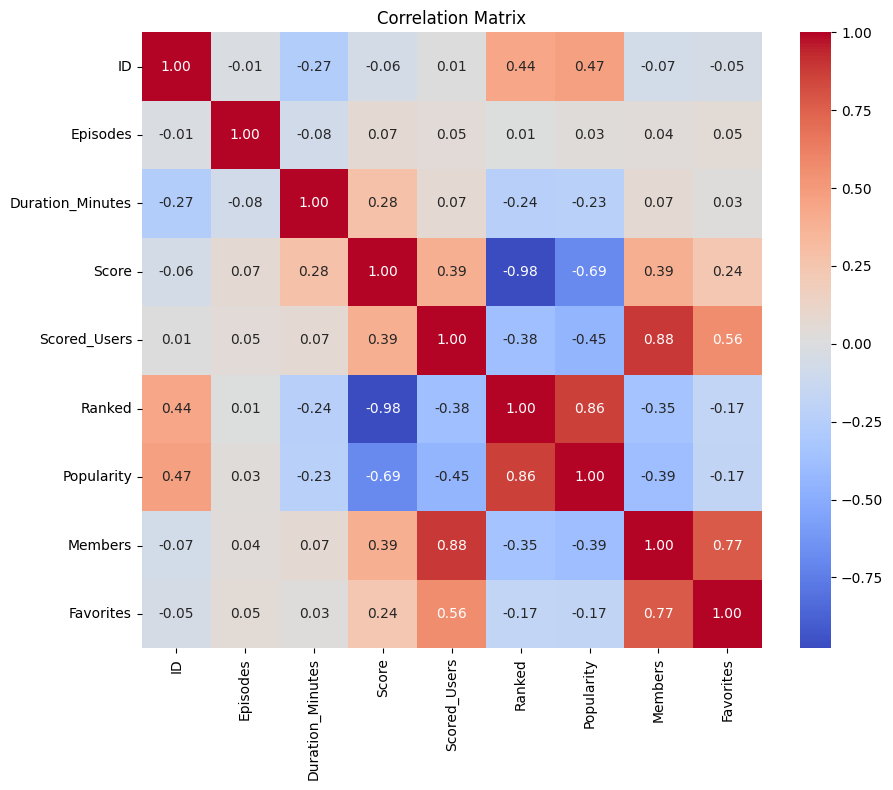

In [9]:
# correlation matrix
corr_matrix = df[num_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Inisight Distribusi dan Korelasi kolom numerical**

Distribusi kolom numerical

* **Jumlah Episode**:
Sebagian besar anime (sekitar 96%) memiliki 1 hingga 102 episode, dengan dominasi anime yang lebih pendek (1-100 episode). Anime dengan lebih dari 100 episode sangat jarang, hanya sekitar 4% dari dataset. Ini menunjukkan bahwa dataset ini sebagian besar terdiri dari anime TV musiman, OVA, atau film, bukan seri panjang.

* **Durasi (Menit)**: Distribusi durasi menunjukkan kecenderungan ke durasi yang lebih pendek. Sekitar 27% anime berdurasi kurang dari 7 menit, kemungkinan adalah anime pendek atau spesial. Lebih dari 20% memiliki durasi standar per episode, yaitu 23-29 menit. Anime berdurasi lebih dari 60 menit (setara film penuh) relatif sedikit. Mayoritas data adalah episode pendek atau standar TV.

* **Skor Pengguna**: Distribusi skor mendekati normal, dengan sebagian besar anime mendapatkan skor 6.2 hingga 7.4. Hanya sedikit anime yang mendapat skor sangat rendah (di bawah 5) atau sangat tinggi (di atas 8). Ini menunjukkan bahwa penilaian pengguna cenderung berada di kategori netral hingga positif.

* **Jumlah Pengguna yang Memberi Skor**:Sekitar 58% anime dinilai oleh kurang dari 33 ribu pengguna. Proporsi ini menurun drastis untuk anime dengan lebih dari 100 ribu pengguna yang memberi skor. Ini mengindikasikan bahwa sebagian besar anime dalam dataset ini kurang populer atau belum ditonton/dinilai oleh banyak pengguna.

* **Peringkat**: Distribusi peringkat tersebar sangat merata di seluruh rentang, dengan proporsi yang relatif konsisten di setiap kategori (sekitar 3%). Ini menunjukkan bahwa banyak anime memiliki peringkat resmi dan penyebarannya luas.

Analisis Korelasi

* Popularitas dan Peringkat: Terdapat korelasi positif kuat antara jumlah pengguna yang memberi skor (Scored_Users) dan peringkat (Ranked). Anime yang lebih banyak diulas cenderung memiliki peringkat yang lebih baik. Ini menunjukkan bahwa popularitas yang diukur dari banyaknya penilai sangat berpengaruh pada posisi peringkat suatu anime.

* Jumlah Episode dan Durasi: Hubungan antara jumlah episode (Episodes) dan durasi total (Duration_Minutes) adalah korelasi positif kuat. Semakin banyak episode, semakin panjang durasi total anime, sebuah temuan yang sudah bisa diprediksi.

* Kualitas dan Panjang Anime: Tidak ada korelasi yang signifikan antara skor pengguna (Score) dengan jumlah episode (Episodes) maupun durasi total (Duration_Minutes). Ini berarti panjang atau pendeknya sebuah anime tidak mencerminkan kualitasnya di mata penonton. Anime pendek bisa memiliki skor tinggi, dan anime panjang bisa jadi biasa saja, atau sebaliknya.

* Skor dan Peringkat: Ada korelasi negatif sedang antara peringkat (Ranked) dan skor (Score). Semakin tinggi skor suatu anime, semakin baik pula peringkatnya (angka peringkat yang lebih kecil). Ini sesuai dengan cara kerja sistem peringkat yang umumnya didasarkan pada skor rata-rata.

* Skor dan Popularitas: Korelasi antara skor (Score) dengan jumlah pengguna yang memberi skor (Scored_Users) cenderung lemah positif. Anime dengan skor lebih tinggi mungkin sedikit lebih banyak dinilai, tetapi popularitas (dalam hal jumlah penilai) tidak secara signifikan menjamin skor yang sangat tinggi.

In [10]:
# Mengelompokkan categorical column
cat_columns = df.select_dtypes(exclude='number').columns.tolist()
print(cat_columns)

['Title', 'Synonyms', 'Japanese', 'English', 'Synopsis', 'Type', 'Status', 'Start_Aired', 'End_Aired', 'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Themes', 'Demographics', 'Rating']


In [11]:
# Distribusi kolom kategorikal
df[cat_columns].nunique()

Title           21460
Synonyms        11557
Japanese        20473
English          8897
Synopsis        18505
Type                7
Status              3
Start_Aired      8221
End_Aired        4796
Premiered         238
Broadcast         569
Producers        4158
Licensors         261
Studios          1424
Source             17
Genres            926
Themes            736
Demographics       10
Rating              6
dtype: int64

In [12]:
for col in cat_columns:
  print(f"\nDistribution for: {col}")
  print(df[col].value_counts().head())
  print("-"*30)


Distribution for: Title
Title
Konglong Wang                          1
Shingeki no Kyojin                     1
Death Note                             1
Fullmetal Alchemist: Brotherhood       1
Xingxing Muchang: Ban Ni Chengzhang    1
Name: count, dtype: int64
------------------------------

Distribution for: Synonyms
Synonyms
Unknown                    9280
Minna no Uta                345
Irodorimidori                46
iMarine                       9
Irodorimidori, HaNaMiNa       7
Name: count, dtype: int64
------------------------------

Distribution for: Japanese
Japanese
Unknown        62
僕のヒーローアカデミア     6
おしりたんてい         6
ゲゲゲの鬼太郎         5
ああっ女神さまっ        4
Name: count, dtype: int64
------------------------------

Distribution for: English
English
Unknown                       12378
Cyborg 009                        4
Meow Meow Japanese History        4
The Westward                      4
Spirit Guardians                  4
Name: count, dtype: int64
----------------------------

<Figure size 1200x600 with 0 Axes>

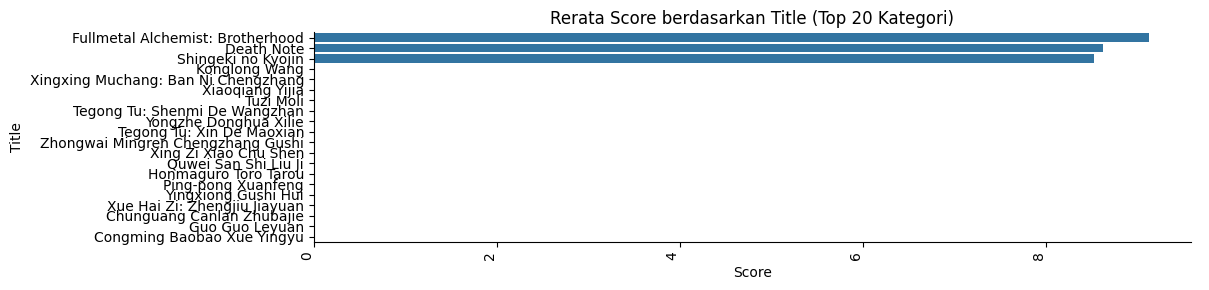

<Figure size 1200x600 with 0 Axes>

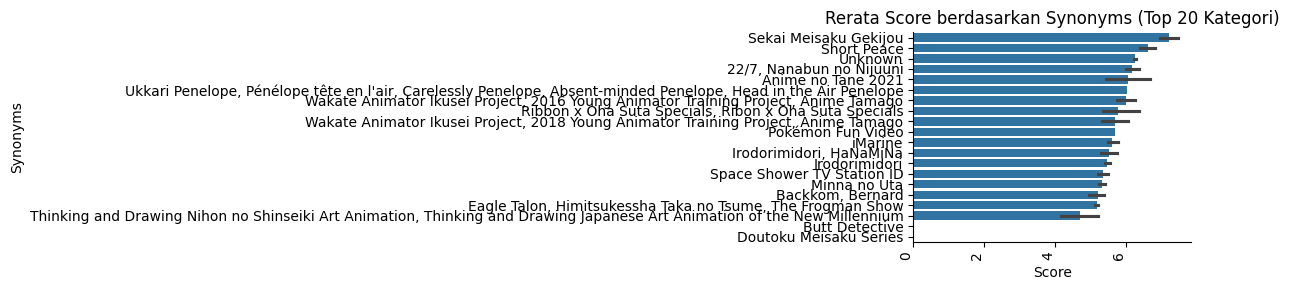

<Figure size 1200x600 with 0 Axes>

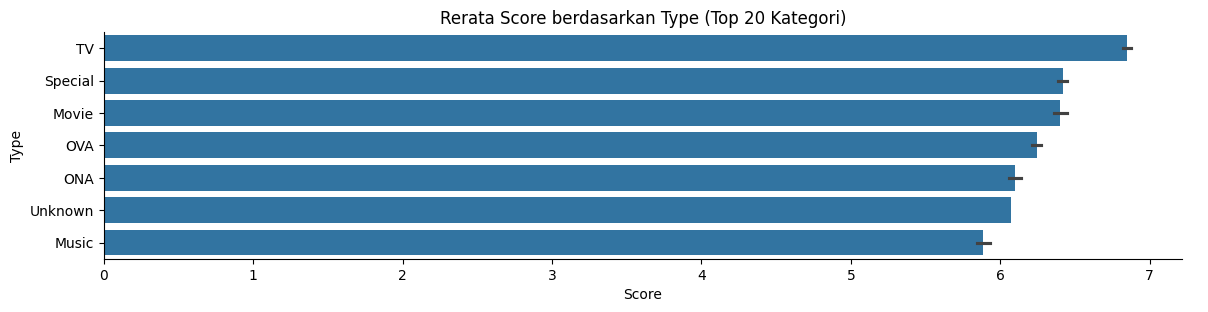

<Figure size 1200x600 with 0 Axes>

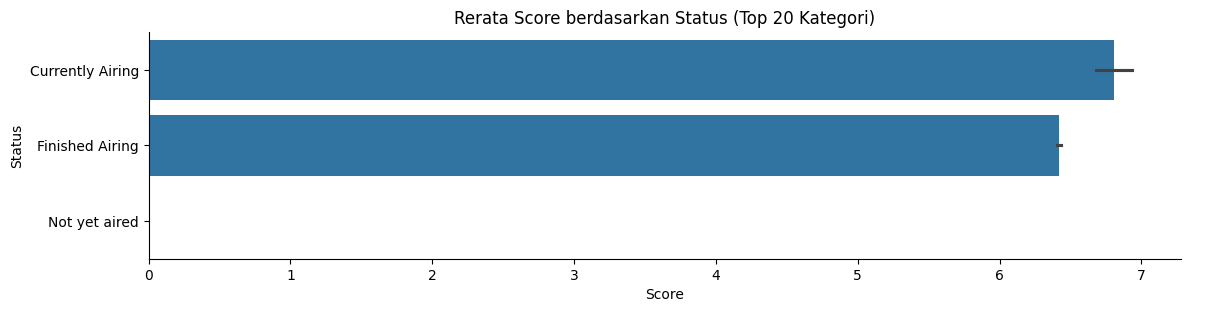

<Figure size 1200x600 with 0 Axes>

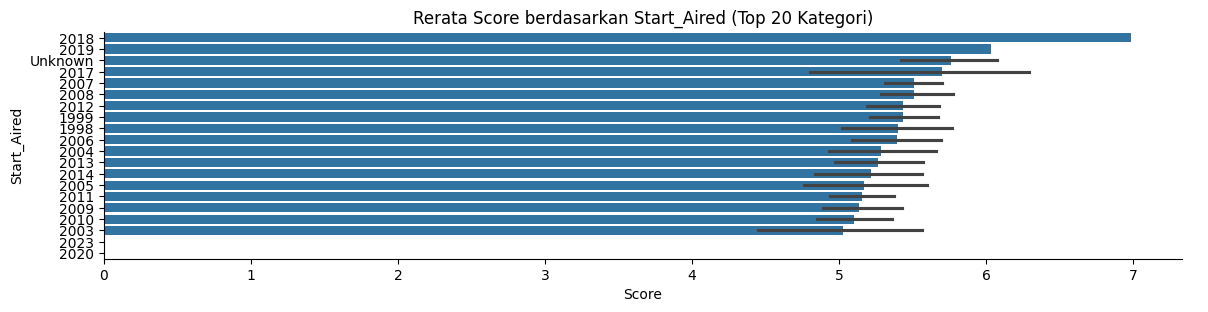

<Figure size 1200x600 with 0 Axes>

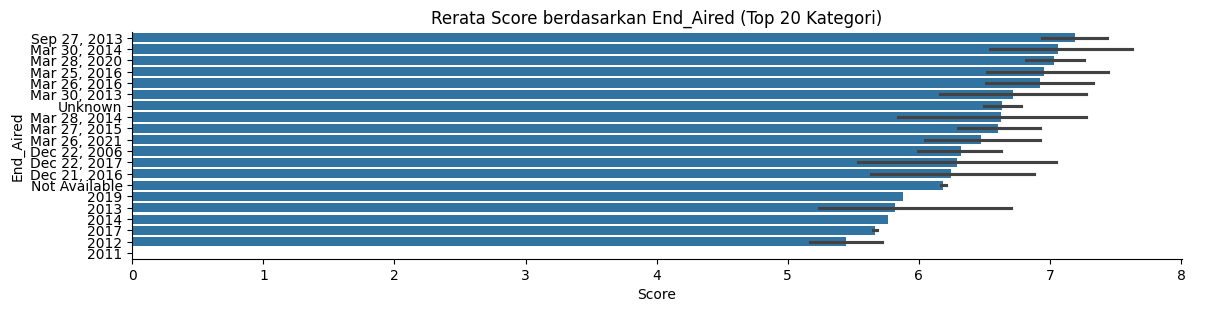

<Figure size 1200x600 with 0 Axes>

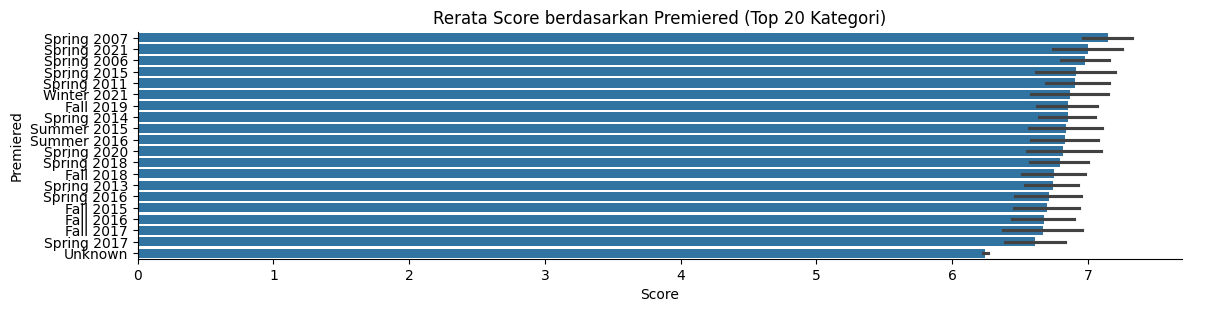

<Figure size 1200x600 with 0 Axes>

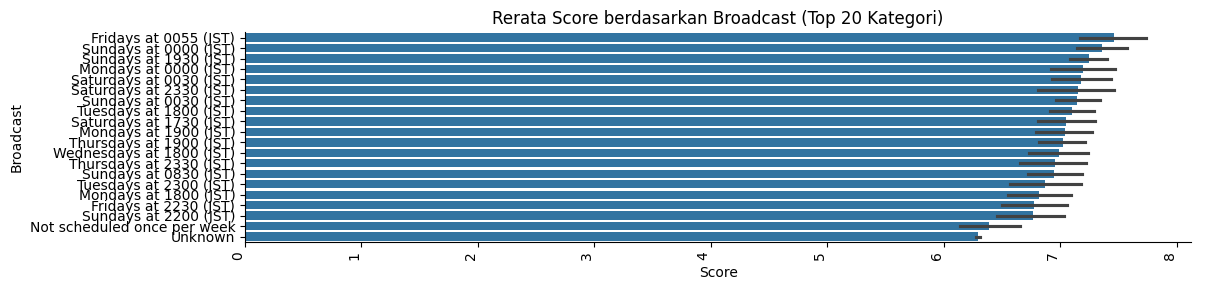

<Figure size 1200x600 with 0 Axes>

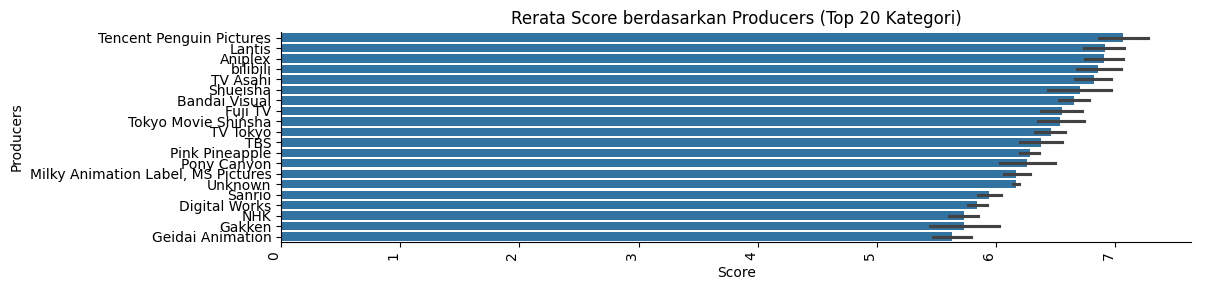

<Figure size 1200x600 with 0 Axes>

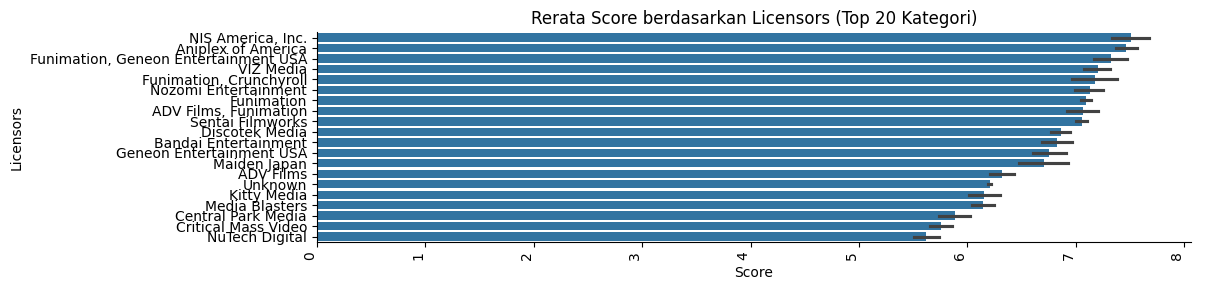

<Figure size 1200x600 with 0 Axes>

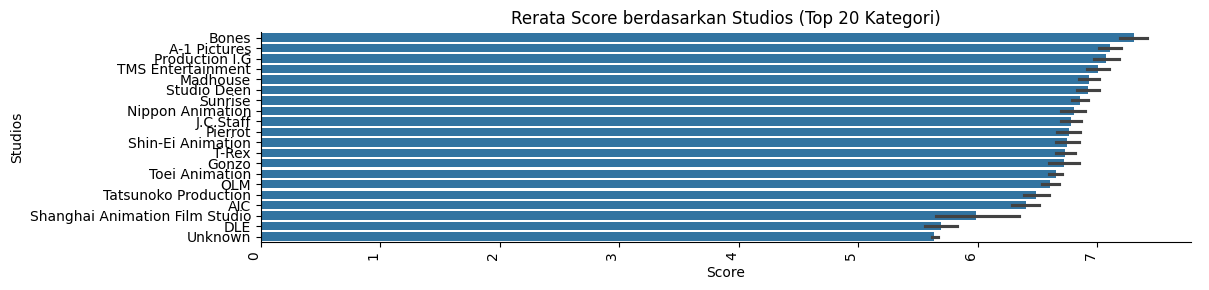

<Figure size 1200x600 with 0 Axes>

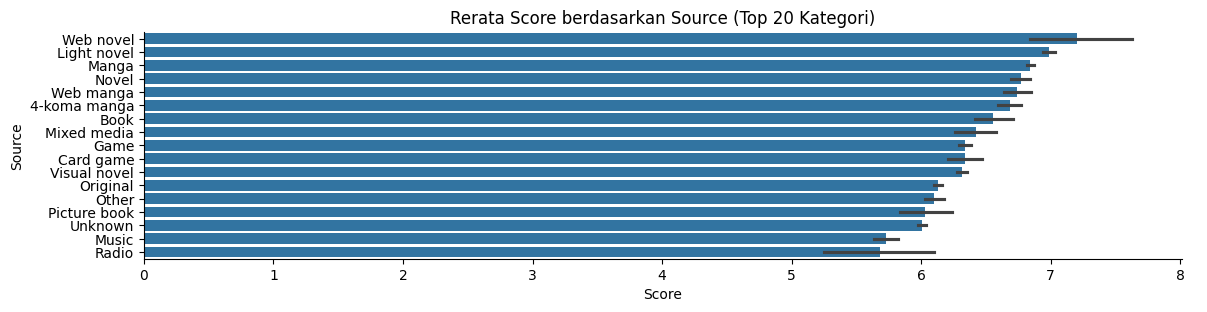

<Figure size 1200x600 with 0 Axes>

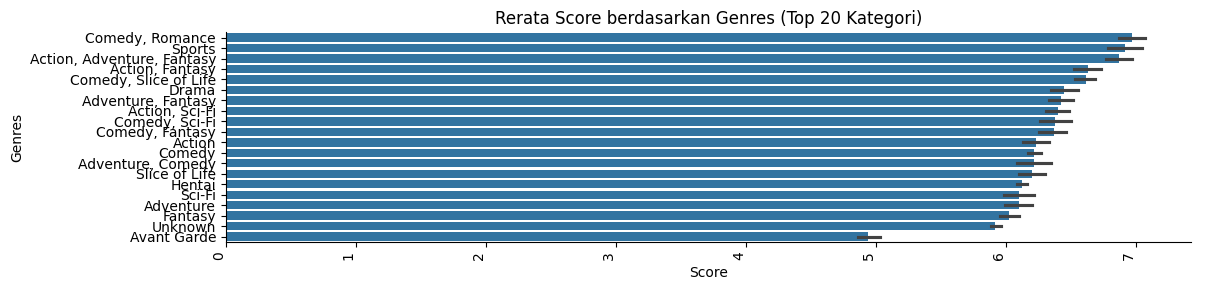

<Figure size 1200x600 with 0 Axes>

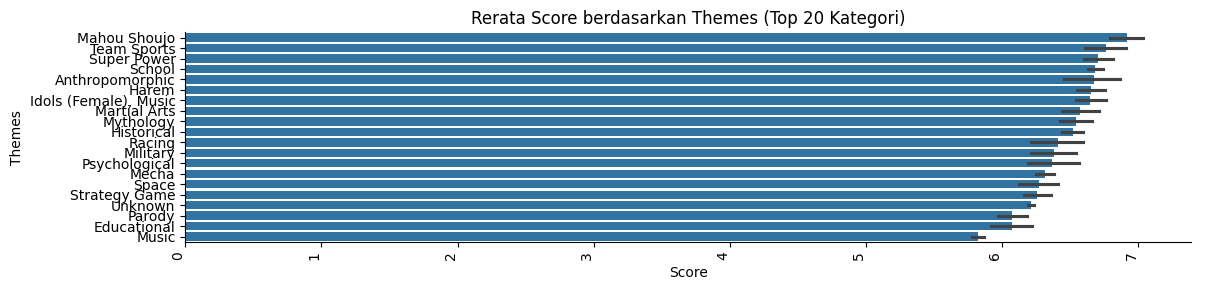

<Figure size 1200x600 with 0 Axes>

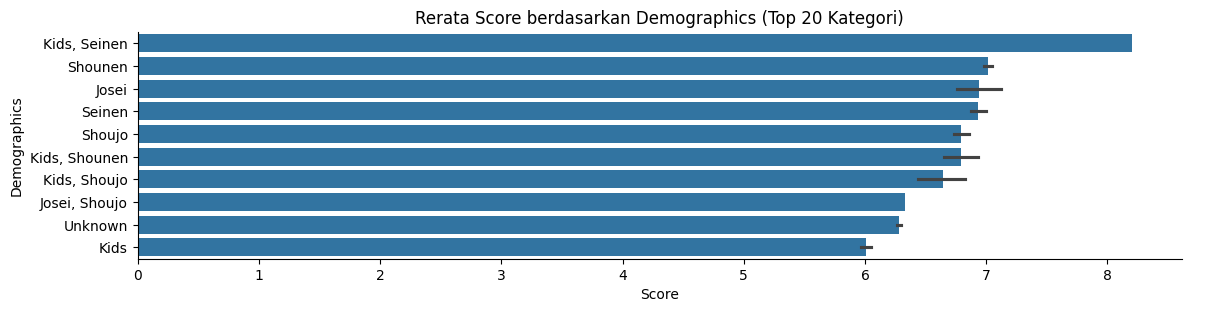

<Figure size 1200x600 with 0 Axes>

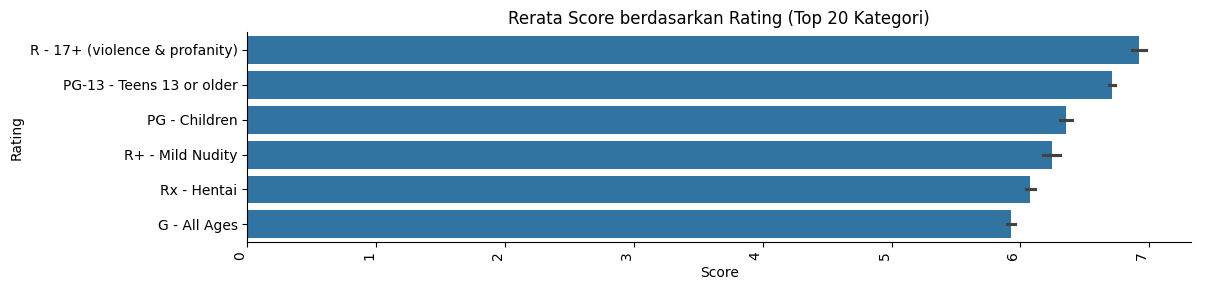

In [13]:
# visualisasi rerata categorical kolom by score
top_n = 20
cols_to_check = [col for col in cat_columns if col not in ['Japanese', 'English', 'Synopsis']]

for col in cols_to_check:
  average_score = df.groupby(col)['Score'].mean().sort_values(ascending=False)
  top_categories = df[col].value_counts().nlargest(top_n).index
  ordered_top_categories = average_score.reindex(top_categories).sort_values(ascending=False).index
  df_filtered = df[df[col].isin(top_categories)]


  plt.figure(figsize=(12, 6))
  sns.catplot(data=df_filtered, y=col, x='Score', kind='bar', order=ordered_top_categories, height=6/2, aspect=12/6*2)
  plt.title(f"Rerata Score berdasarkan {col} (Top {top_n} Kategori)")

  if df_filtered[col].apply(lambda x: len(str(x))).max() > 20:

    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [14]:
unknown_counts = {}
total_rows = df.shape[0]

for col in df.columns:
    if df[col].dtype == 'object':
        unknown_count = df[col].astype(str).str.lower().eq('unknown').sum()
        if unknown_count > 0:
            unknown_counts[col] = unknown_count

print("Jumlah baris dengan nilai 'Unknown' per kolom:")
for col, count in unknown_counts.items():
    percentage = (count / total_rows) * 100
    print(f"- Kolom '{col}': {count} baris ({percentage:.2f}%)")

Jumlah baris dengan nilai 'Unknown' per kolom:
- Kolom 'Synonyms': 9280 baris (43.24%)
- Kolom 'Japanese': 62 baris (0.29%)
- Kolom 'English': 12378 baris (57.68%)
- Kolom 'Synopsis': 2718 baris (12.67%)
- Kolom 'Type': 45 baris (0.21%)
- Kolom 'Start_Aired': 374 baris (1.74%)
- Kolom 'End_Aired': 1073 baris (5.00%)
- Kolom 'Premiered': 16236 baris (75.66%)
- Kolom 'Broadcast': 18316 baris (85.35%)
- Kolom 'Producers': 10588 baris (49.34%)
- Kolom 'Licensors': 16884 baris (78.68%)
- Kolom 'Studios': 8090 baris (37.70%)
- Kolom 'Source': 3602 baris (16.78%)
- Kolom 'Genres': 3699 baris (17.24%)
- Kolom 'Themes': 9648 baris (44.96%)
- Kolom 'Demographics': 13426 baris (62.56%)


**Insight Distribusi kolom kategorikal**

* Judul: Unik dan lengkap.
* Informasi Tambahan (Sinonim, Judul Jepang/Inggris): Judul bahasa Inggris dan sinonim seringkali tidak diketahui. Judul Jepang relatif lengkap.
* Sinopsis: Sebagian kecil data tidak memiliki sinopsis.
* Tipe dan Status: Didominasi oleh anime TV, OVA, dan Movie. Sebagian besar anime sudah selesai tayang.
* Informasi Tayang: Informasi waktu tayang (Premiered, Broadcast) seringkali tidak lengkap.
* Informasi Produksi: Informasi produser, pemberi lisensi, dan studio produksi banyak yang hilang.
* Sumber Materi: Kebanyakan anime berasal dari karya original atau manga. Informasi sumber seringkali tidak diketahui.
* Genre, Tema, Demografi: Informasi genre, tema, dan demografi seringkali tidak lengkap.
* Rating: Mayoritas anime ditujukan untuk remaja dan semua umur.

# Data Preparation

In [15]:
# Menghapus baris dengan missing value
print("Jumlah baris sebelum menghapus missing value", df.shape[0])
df.dropna(inplace=True)
print("Jumlah baris setelah menghapus missing value", df.shape[0])
df.reset_index(drop=True, inplace=True)

# Menghapus kolom dengan 'Unkown' lebih dari 40%
cols_to_drop = ['Synonyms', 'English', 'Premiered', 'Broadcast', 'Licensors','Producers', 'Themes', 'Demographics']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

Jumlah baris sebelum menghapus missing value 21460
Jumlah baris setelah menghapus missing value 12937


,ID,Title,Japanese,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Studios,Source,Genres,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,進撃の巨人,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Wit Studio,Manga,"Action, Drama",24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,デスノート,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Madhouse,Manga,"Supernatural, Suspense",23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Bones,Manga,"Action, Adventure, Drama, Fantasy",24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,ワンパンマン,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015","Dec 21, 2015",Madhouse,Web manga,"Action, Comedy",24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,ソードアート・オンライン,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012","Dec 23, 2012",A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance",23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [16]:
# Transformasi fitur yang skewed
skewed_cols = ['Episodes', 'Duration_Minutes', 'Scored_Users', 'Members', 'Favorites']
for col in skewed_cols:
    df[col + '_log'] = np.log1p(df[col])
df.drop(columns=skewed_cols, inplace=True)
df.head()

,ID,Title,Japanese,Synopsis,Type,Status,Start_Aired,End_Aired,Studios,Source,Genres,Rating,Score,Ranked,Popularity,Episodes_log,Duration_Minutes_log,Scored_Users_log,Members_log,Favorites_log
0,16498,Shingeki no Kyojin,進撃の巨人,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Wit Studio,Manga,"Action, Drama",R - 17+ (violence & profanity),8.531,1002.0,1,3.258097,3.218876,13.161207,15.075138,11.955661
1,1535,Death Note,デスノート,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Madhouse,Manga,"Supernatural, Suspense",R - 17+ (violence & profanity),8.621,732.0,2,3.637586,3.178054,13.092910,15.069569,11.981065
2,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Bones,Manga,"Action, Adventure, Drama, Fantasy",R - 17+ (violence & profanity),9.131,12.0,3,4.174387,3.218876,13.710593,14.906916,12.244201
3,30276,One Punch Man,ワンパンマン,The seemingly unimpressive Saitama has a rathe...,TV,Finished Airing,"Oct 5, 2015","Dec 21, 2015",Madhouse,Web manga,"Action, Comedy",R - 17+ (violence & profanity),8.511,1112.0,4,2.564949,3.218876,9.855714,14.873269,10.996283
4,11757,Sword Art Online,ソードアート・オンライン,Ever since the release of the innovative Nerve...,TV,Finished Airing,"Jul 8, 2012","Dec 23, 2012",A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance",PG-13 - Teens 13 or older,7.201,29562.0,5,3.258097,3.178054,13.805718,14.849963,11.082112


In [17]:
# Pisahkan genre yang dipisah koma
df['Genres'] = df['Genres'].fillna('').apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_)

# Gabungkan ke dataframe utama
df = pd.concat([df, genre_encoded], axis=1)
df.head()

,ID,Title,Japanese,Synopsis,Type,Status,Start_Aired,End_Aired,Studios,Source,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,Unknown
0,16498,Shingeki no Kyojin,進撃の巨人,"Centuries ago, mankind was slaughtered to near...",TV,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Wit Studio,Manga,...,0,0,0,0,0,0,0,0,0,0
1,1535,Death Note,デスノート,"Brutal murders, petty thefts, and senseless vi...",TV,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Madhouse,Manga,...,0,0,0,0,0,0,0,1,1,0
2,5114,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,After a horrific alchemy experiment goes wrong...,TV,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Bones,Manga,...,0,0,0,0,0,0,0,0,0,0
3,30276,One Punch Man,ワンパンマン,The seemingly unimpressive Saitama has a rathe...,TV,Finished Airing,"Oct 5, 2015","Dec 21, 2015",Madhouse,Web manga,...,0,0,0,0,0,0,0,0,0,0
4,11757,Sword Art Online,ソードアート・オンライン,Ever since the release of the innovative Nerve...,TV,Finished Airing,"Jul 8, 2012","Dec 23, 2012",A-1 Pictures,Light novel,...,0,0,0,1,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12937 entries, 0 to 12936
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    12937 non-null  int64  
 1   Title                 12937 non-null  object 
 2   Japanese              12937 non-null  object 
 3   Synopsis              12937 non-null  object 
 4   Type                  12937 non-null  object 
 5   Status                12937 non-null  object 
 6   Start_Aired           12937 non-null  object 
 7   End_Aired             12937 non-null  object 
 8   Studios               12937 non-null  object 
 9   Source                12937 non-null  object 
 10  Genres                12937 non-null  object 
 11  Rating                12937 non-null  object 
 12  Score                 12937 non-null  float64
 13  Ranked                12937 non-null  float64
 14  Popularity            12937 non-null  int64  
 15  Episodes_log       

In [19]:
df['End_Aired'].value_counts()

End_Aired
Not Available    6568
Unknown            36
Mar 26, 2016       13
Mar 30, 2014       12
Mar 28, 2015       11
                 ... 
May 8, 2014         1
Dec 12, 2021        1
Oct 18, 2014        1
May 15, 2012        1
Jun 1, 2010         1
Name: count, Length: 3612, dtype: int64

In [20]:
# Duplikat dataframe dan hapus kolom identitas yang tidak digunakan dalam model
df_model = df.copy()
df_model = df_model.drop(columns=['ID', 'Synopsis', 'Title', 'Japanese', 'Studios', 'End_Aired'])

# Ambil tahun dari Start_Aired dan End_Aired
def extract_year(val):
    try:
        # Jika formatnya sudah berupa tanggal
        year = pd.to_datetime(val, errors='coerce').year
        if pd.notnull(year):
            return int(year)
        # Jika hanya tahunnya (misalnya '2012')
        if str(val).isdigit() and len(val) == 4:
            return int(val)
    except:
        pass
    return np.nan

df_model['Start_Year'] = df['Start_Aired'].apply(extract_year)

# Isi missing year dengan median
df_model['Start_Year'] = df_model['Start_Year'].fillna(df_model['Start_Year'].median())

# Drop kolom Start_Aired aslinya
df_model = df_model.drop(columns='Start_Aired')

df_model.head()

,Type,Status,Source,Genres,Rating,Score,Ranked,Popularity,Episodes_log,Duration_Minutes_log,...,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,Unknown,Start_Year
0,TV,Finished Airing,Manga,"[Action, Drama]",R - 17+ (violence & profanity),8.531,1002.0,1,3.258097,3.218876,...,0,0,0,0,0,0,0,0,0,2013.0
1,TV,Finished Airing,Manga,"[Supernatural, Suspense]",R - 17+ (violence & profanity),8.621,732.0,2,3.637586,3.178054,...,0,0,0,0,0,0,1,1,0,2006.0
2,TV,Finished Airing,Manga,"[Action, Adventure, Drama, Fantasy]",R - 17+ (violence & profanity),9.131,12.0,3,4.174387,3.218876,...,0,0,0,0,0,0,0,0,0,2009.0
3,TV,Finished Airing,Web manga,"[Action, Comedy]",R - 17+ (violence & profanity),8.511,1112.0,4,2.564949,3.218876,...,0,0,0,0,0,0,0,0,0,2015.0
4,TV,Finished Airing,Light novel,"[Action, Adventure, Fantasy, Romance]",PG-13 - Teens 13 or older,7.201,29562.0,5,3.258097,3.178054,...,0,0,1,0,0,0,0,0,0,2012.0


In [21]:
# One-Hot Encoding kolom kategorikal tersisa
categorical_cols = ['Type', 'Status', 'Source', 'Rating']
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

df_model.head()

,Genres,Score,Ranked,Popularity,Episodes_log,Duration_Minutes_log,Scored_Users_log,Members_log,Favorites_log,Action,...,Source_Picture book,Source_Radio,Source_Unknown,Source_Visual novel,Source_Web manga,Source_Web novel,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity
0,"[Action, Drama]",8.531,1002.0,1,3.258097,3.218876,13.161207,15.075138,11.955661,1,...,False,False,False,False,False,False,False,False,True,False
1,"[Supernatural, Suspense]",8.621,732.0,2,3.637586,3.178054,13.092910,15.069569,11.981065,0,...,False,False,False,False,False,False,False,False,True,False
2,"[Action, Adventure, Drama, Fantasy]",9.131,12.0,3,4.174387,3.218876,13.710593,14.906916,12.244201,1,...,False,False,False,False,False,False,False,False,True,False
3,"[Action, Comedy]",8.511,1112.0,4,2.564949,3.218876,9.855714,14.873269,10.996283,1,...,False,False,False,False,True,False,False,False,True,False
4,"[Action, Adventure, Fantasy, Romance]",7.201,29562.0,5,3.258097,3.178054,13.805718,14.849963,11.082112,1,...,False,False,False,False,False,False,False,True,False,False


In [22]:
# Menghapus kolom 'Genres' sebelum scaling
if 'Genres' in df_model.columns:
    df_model = df_model.drop(columns=['Genres'])

# Normalisasi semua kolom numerik
genre_cols = [col for col in df_model.columns if col in ['Action', 'Adventure', 'Avant Garde', 'Award Winning',
       'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Girls Love',
       'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life',
       'Sports', 'Supernatural', 'Suspense', 'Unknown']]
non_genre_cols = [col for col in df_model.columns if col not in genre_cols]

# Scaling untuk non-genre cols
scaler = MinMaxScaler()
df_model_scaled = df_model.copy()
df_model_scaled[non_genre_cols] = scaler.fit_transform(df_model_scaled[non_genre_cols])

df_model_scaled.head()

,Score,Ranked,Popularity,Episodes_log,Duration_Minutes_log,Scored_Users_log,Members_log,Favorites_log,Action,Adventure,...,Source_Picture book,Source_Radio,Source_Unknown,Source_Visual novel,Source_Web manga,Source_Web novel,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity
0,0.917695,0.007546,0.000000,0.349812,0.569274,0.929086,1.000000,0.976434,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.930041,0.005488,0.000056,0.401567,0.560073,0.921652,0.999439,0.978509,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.000000,0.000111,0.474777,0.569274,0.988881,0.983045,1.000000,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.914952,0.008385,0.000167,0.255279,0.569274,0.569315,0.979654,0.898081,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.735254,0.225246,0.000222,0.349812,0.560073,0.999235,0.977305,0.905091,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# Membuat dataframe final
df_final = df_model_scaled
df_final.head()

,Score,Ranked,Popularity,Episodes_log,Duration_Minutes_log,Scored_Users_log,Members_log,Favorites_log,Action,Adventure,...,Source_Picture book,Source_Radio,Source_Unknown,Source_Visual novel,Source_Web manga,Source_Web novel,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity
0,0.917695,0.007546,0.000000,0.349812,0.569274,0.929086,1.000000,0.976434,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.930041,0.005488,0.000056,0.401567,0.560073,0.921652,0.999439,0.978509,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.000000,0.000111,0.474777,0.569274,0.988881,0.983045,1.000000,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.914952,0.008385,0.000167,0.255279,0.569274,0.569315,0.979654,0.898081,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.735254,0.225246,0.000222,0.349812,0.560073,0.999235,0.977305,0.905091,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Dokumentasi Tahapan Data Preparation**

* Penghapusan Baris dengan Missing Values: Dari 21.460 baris awal, 12.937 baris dipertahankan setelah menghapus entri dengan nilai kosong.
* Penghapusan Kolom 'Unknown': Kolom dengan lebih dari 40% nilai 'Unknown', seperti 'Synonyms', 'English', 'Premiered', 'Broadcast', 'Licensors', 'Producers', 'Themes', dan 'Demographics', dihapus.
* Transformasi Logaritmik: Fitur-fitur dengan distribusi miring (skewed) diubah menjadi skala logaritmik ('Episodes', 'Duration_Minutes', 'Scored_Users', 'Members', 'Favorites') untuk meningkatkan kinerja model.
* Ekstraksi dan Encoding Genres: Kolom Genres diubah menjadi format multihot encoding menggunakan MultiLabelBinarizer dan hasilnya digabungkan ke df_final.
* Penghapusan Kolom Non-Relevan: Kolom identitas dan yang tidak digunakan dalam pemodelan seperti 'ID', 'Synopsis', 'Title', 'Japanese', 'Studios', serta 'End_Aired' (karena banyak anime on-going) dihapus.
* Ekstraksi dan Pengisian Start_Year: Tahun diambil dari Start_Aired, nilai kosong diisi dengan median, dan kolom asli dihapus.
* One-Hot Encoding Kategorikal: Kolom kategorikal 'Type', 'Status', 'Source', dan 'Rating' diubah menjadi format numerik melalui one-hot encoding.
* Normalisasi Fitur Numerik: Semua fitur numerik (kecuali hasil encoding Genres) dinormalisasi ke rentang 0–1 menggunakan MinMaxScaler untuk mempersiapkan perhitungan cosine similarity.
* Penyimpanan Data Final: Seluruh data yang telah diproses disimpan dalam DataFrame df_final.

# Modelling

## Popularity-Based Filtering

In [24]:
def get_top_popular_anime(df_final, top_n=10, by='Members_log'):
    popular_df = df_final.copy()
    popular_df['Original_Title'] = df['Title']
    top_anime = popular_df.sort_values(by=by, ascending=False)[['Original_Title', by]].head(top_n)
    return top_anime

# 10 anime paling populer berdasarkan jumlah member
top_anime = get_top_popular_anime(df_final, top_n=10, by='Members_log')
print(top_anime)

                     Original_Title  Members_log
0                Shingeki no Kyojin     1.000000
1                        Death Note     0.999439
2  Fullmetal Alchemist: Brotherhood     0.983045
3                     One Punch Man     0.979654
4                  Sword Art Online     0.977305
5             Boku no Hero Academia     0.973476
6                            Naruto     0.967682
7                       Tokyo Ghoul     0.967646
8                  Kimetsu no Yaiba     0.967410
9            Hunter x Hunter (2011)     0.963940


Pendekatan ini merekomendasikan anime berdasarkan tingkat popularitasnya. Ukuran popularitas yang digunakan adalah jumlah anggota (Members_log) yang menandakan seberapa banyak pengguna yang menambahkan anime tersebut ke daftar mereka. Anime dengan nilai Members_log tertinggi akan dianggap sebagai yang paling populer dan direkomendasikan secara umum kepada semua pengguna.


## Content-Based Filtering

In [25]:
# Simpan index ke judul
df_final['Title'] = df['Title']
indices = pd.Series(df_final.index, index=df_final['Title']).drop_duplicates()

# Drop kolom Title sebelum similarity calculation
content_features = df_final.drop(columns=['Title'])

# Hitung cosine similarity
cosine_sim = cosine_similarity(content_features, content_features)

In [26]:
cosine_sim

array([[1.        , 0.80912886, 0.91786689, ..., 0.26091521, 0.23535461,
        0.24579168],
       [0.80912886, 1.        , 0.74609928, ..., 0.25783173, 0.2324432 ,
        0.24281801],
       [0.91786689, 0.74609928, 1.        , ..., 0.23861548, 0.21510635,
        0.22506508],
       ...,
       [0.26091521, 0.25783173, 0.23861548, ..., 1.        , 0.92877262,
        0.77849728],
       [0.23535461, 0.2324432 , 0.21510635, ..., 0.92877262, 1.        ,
        0.8610282 ],
       [0.24579168, 0.24281801, 0.22506508, ..., 0.77849728, 0.8610282 ,
        1.        ]])

In [27]:
# Fungsi rekomendasi
def get_content_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    if title not in indices:
        return f"Anime dengan judul '{title}' tidak ditemukan."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    anime_indices = [i[0] for i in sim_scores]
    recommended_titles = df_final['Title'].iloc[anime_indices].reset_index(drop=True)
    return recommended_titles

# Contoh pencarian rekomendasi
rekomendasi = get_content_recommendations("Naruto", top_n=10)
print(rekomendasi)

0                          Bleach
1                      Fairy Tail
2              Naruto: Shippuuden
3          Hunter x Hunter (2011)
4               Fairy Tail (2014)
5                 Hunter x Hunter
6         Yu☆Gi☆Oh! Duel Monsters
7               Nanatsu no Taizai
8    Magi: The Labyrinth of Magic
9        Fairy Tail: Final Series
Name: Title, dtype: object


Permodelan Sistem Rekomendasi Content-Based Filtering
Sistem rekomendasi ini menggunakan pendekatan Content-Based Filtering untuk menyarankan anime berdasarkan kemiripan fitur-fiturnya yang sudah dihitung menggunakan cosine smiliarity

# Evaluasi

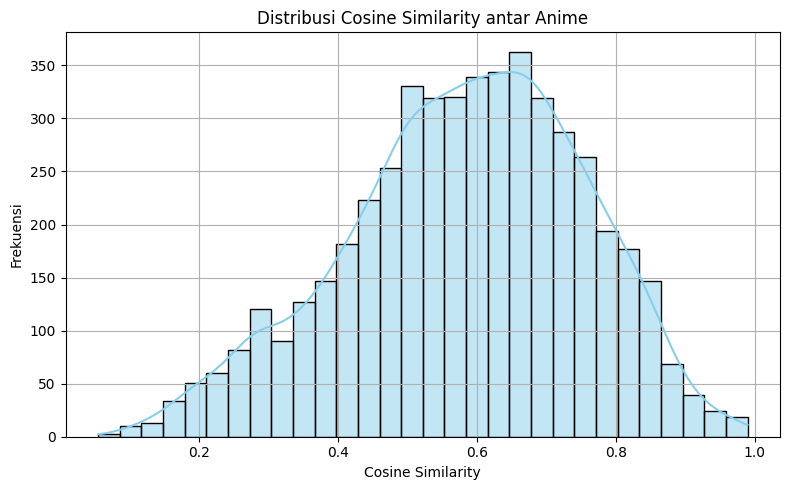

In [28]:
# Simulasi data dummy dari df_final
np.random.seed(42)
num_samples = 100
df_final_simulated = pd.DataFrame({
    'Title': [f"Anime {i}" for i in range(num_samples)],
    'Score': np.random.uniform(5, 10, num_samples),
    'Ranked': np.random.randint(1, 5000, num_samples),
    'Popularity': np.random.randint(1, 10000, num_samples),
    'Members_log': np.random.uniform(4, 6, num_samples),  # log scale
    'Favorites_log': np.random.uniform(2, 4, num_samples),
    'Action': np.random.randint(0, 2, num_samples),
    'Comedy': np.random.randint(0, 2, num_samples),
    'Drama': np.random.randint(0, 2, num_samples),
    'Romance': np.random.randint(0, 2, num_samples),
    'Sci-Fi': np.random.randint(0, 2, num_samples)
})

# Simulasi content-based features
content_features = df_final_simulated.drop(columns=['Title'])
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(content_features)

# Hitung cosine similarity
cosine_sim = cosine_similarity(scaled_features)

# Tampilkan distribusi cosine similarity
sim_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]  # ambil pasangan unik (non-diagonal)
plt.figure(figsize=(8, 5))
sns.histplot(sim_scores, bins=30, kde=True, color='skyblue')
plt.title('Distribusi Cosine Similarity antar Anime')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Daftar judul yang direkomendasikan
judul_rekomendasi = [
    "Bleach",
    "Fairy Tail",
    "Naruto: Shippuuden",
    "Hunter x Hunter (2011)",
    "Fairy Tail (2014)",
    "Hunter x Hunter",
    "Yu☆Gi☆Oh! Duel Monsters",
    "Nanatsu no Taizai",
    "Magi: The Labyrinth of Magic",
    "Fairy Tail: Final Series",
    "Naruto"
]

# Filter DataFrame berdasarkan judul rekomendasi
df_eval = df[df['Title'].isin(judul_rekomendasi)][['Title', 'Genres', 'Type', 'Source', 'Rating']]

# Reset index agar rapi
df_eval = df_eval.reset_index(drop=True)

# Tampilkan DataFrame hasil filter
display(df_eval)

,Title,Genres,Type,Source,Rating
0,Naruto,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
1,Hunter x Hunter (2011),"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
2,Naruto: Shippuuden,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
3,Nanatsu no Taizai,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
4,Bleach,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
5,Fairy Tail,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
6,Magi: The Labyrinth of Magic,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
7,Fairy Tail (2014),"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
8,Hunter x Hunter,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older
9,Fairy Tail: Final Series,"[Action, Adventure, Fantasy]",TV,Manga,PG-13 - Teens 13 or older


**Interpretasi**
Skor cosine similarity berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip).Hasil evaluasi menunjukkan bahwa sebagian besar pasangan anime memiliki similarity yang sedang hingga tinggi.Hal ini mengindikasikan bahwa model dapat memberikan rekomendasi berbasis konten yang cukup relevan secara umum. Dari `display(df_eval)` juga menunjukkan semua judul memiliki genre yang identik dengan Naruto (Action, Adventure, Fantasy), Semua judul berasal dari TV series dengan sumber Manga dan memiliki rating yang sama yaitu PG-13.

**Keterbatasan Evaluasi**
Karena tidak terdapat ground truth atau umpan balik pengguna dalam dataset ini, evaluasi kuantitatif terhadap akurasi hasil rekomendasi belum dapat dilakukan. Namun demikian, analisis distribusi similarity memberikan indikasi awal tentang performa model.